In [15]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.simplefilter('ignore')

In [16]:
path = 'dataset/Crop_recommendation.csv'
df = pd.read_csv(path)

print(df.shape)
df.head()

(2200, 8)


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [17]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [18]:
features = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size=0.7,random_state=2)

In [19]:

analysis = {
    'name': [],
    'accuracy': [],
}


def evaluate_model(model, name, indepth):
    print('-' * 15, name, '-' * 15)
    y_pred = model.predict(Xtest)

    # gives the precision, f1 score and recall for each class
    if indepth:
        print(classification_report(Ytest, y_pred))
    
    # gives the accuracy score
    test_accuracy = accuracy_score(Ytest, y_pred)
    train_accuracy = accuracy_score(Ytrain, model.predict(Xtrain))
    print(f'Test Accuracy: {test_accuracy*100:.3f}%')
    print(f'Train Accuracy: {train_accuracy*100:.3f}%')

    # plots the confusion matrix as a heatmap
    # results are good if the colors are in a diagonal line
    mat = confusion_matrix(Ytest, y_pred)
    sns.heatmap(mat, annot=True, fmt='d', cbar=False, yticklabels=model.classes_, xticklabels=model.classes_)

    # storing data to compare later
    analysis['name'].append(name)
    analysis['accuracy'].append(test_accuracy)


--------------- Decision Tree ---------------
Test Accuracy: 96.364%
Train Accuracy: 100.000%


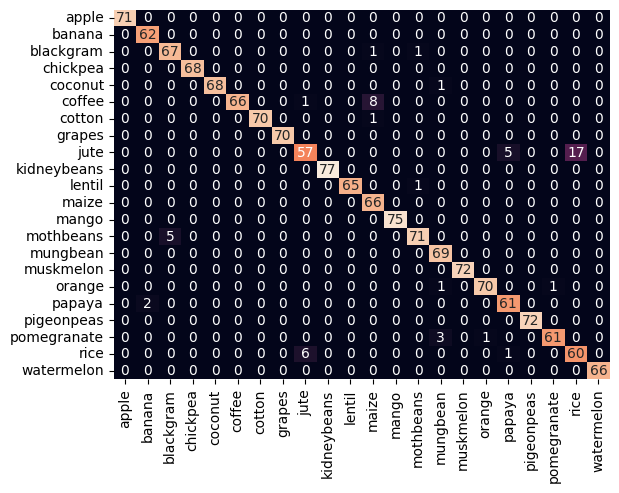

In [20]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(Xtrain, Ytrain)
evaluate_model(model, 'Decision Tree', indepth=False)

--------------- Random Forest ---------------
Test Accuracy: 99.481%
Train Accuracy: 100.000%


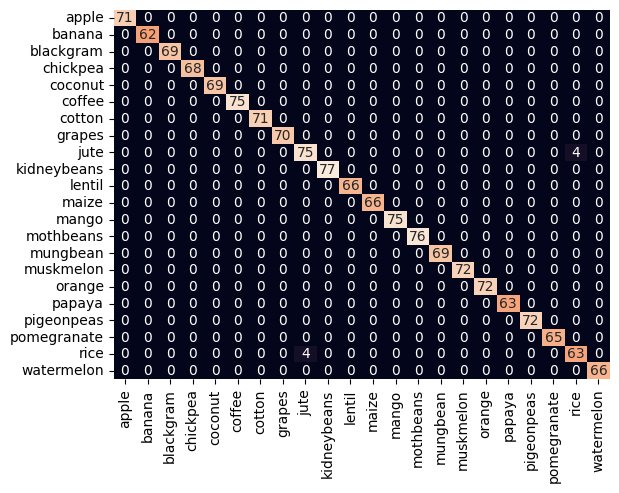

In [21]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(Xtrain, Ytrain)
evaluate_model(model, 'Random Forest', indepth=False)

--------------- Naive Bayes ---------------
Test Accuracy: 99.351%
Train Accuracy: 99.545%


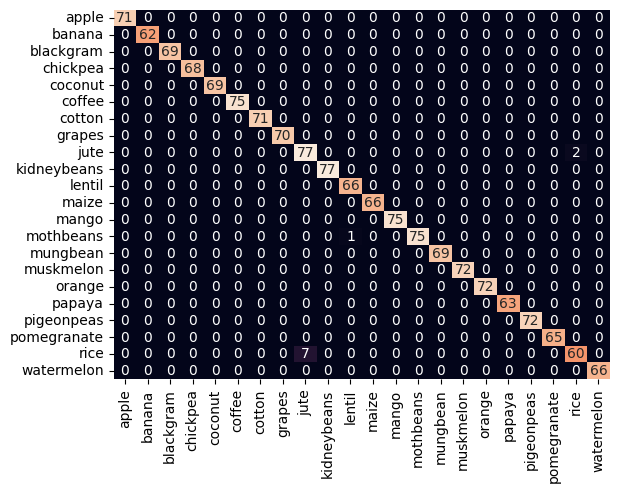

In [29]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(Xtrain, Ytrain)
evaluate_model(model, 'Naive Bayes', indepth=False)

import pickle
with open('naive_bayes_model.pkl', 'wb') as file:
    pickle.dump(model, file)

--------------- KNN ---------------
Test Accuracy: 96.883%
Train Accuracy: 98.636%


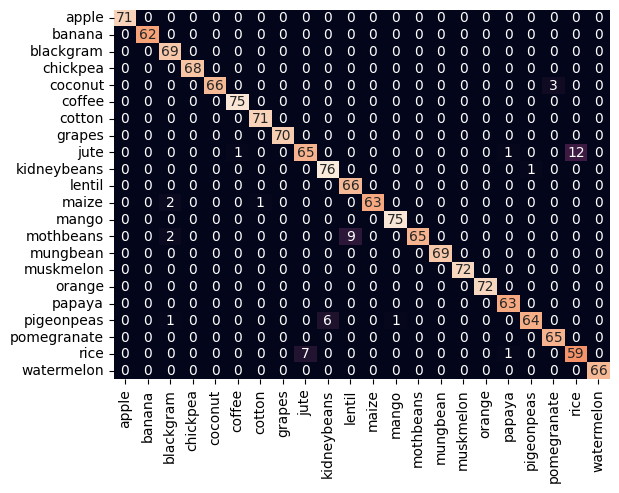

In [23]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(Xtrain, Ytrain)
evaluate_model(model, 'KNN', indepth=False)

--------------- SVM ---------------
Test Accuracy: 97.078%
Train Accuracy: 96.515%


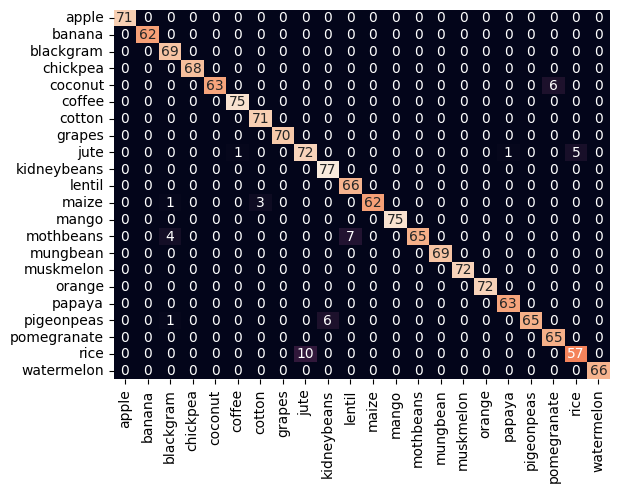

In [24]:
from sklearn.svm import SVC

model = SVC()
model.fit(Xtrain, Ytrain)
evaluate_model(model, 'SVM', indepth=False)

--------------- Logistic Regression ---------------
Test Accuracy: 94.610%
Train Accuracy: 97.879%


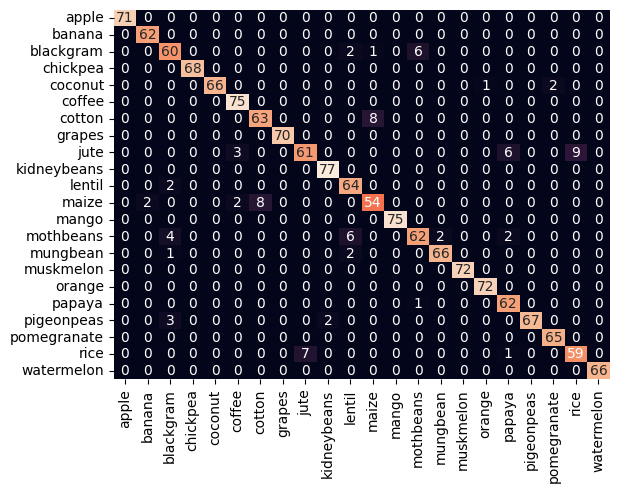

In [25]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(Xtrain, Ytrain)
evaluate_model(model, 'Logistic Regression', indepth=False)

--------------- Perceptron ---------------
Test Accuracy: 50.000%
Train Accuracy: 51.515%


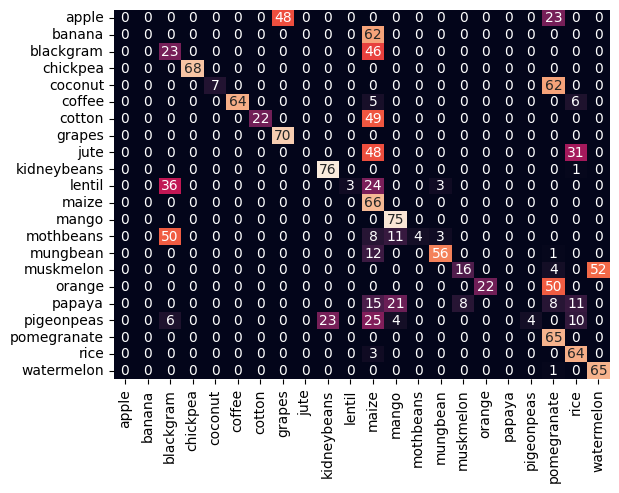

In [26]:
from sklearn.linear_model import Perceptron

model = Perceptron()
model.fit(Xtrain, Ytrain)
evaluate_model(model, 'Perceptron', indepth=False)

--------------- MLP ---------------
Test Accuracy: 84.610%
Train Accuracy: 89.697%


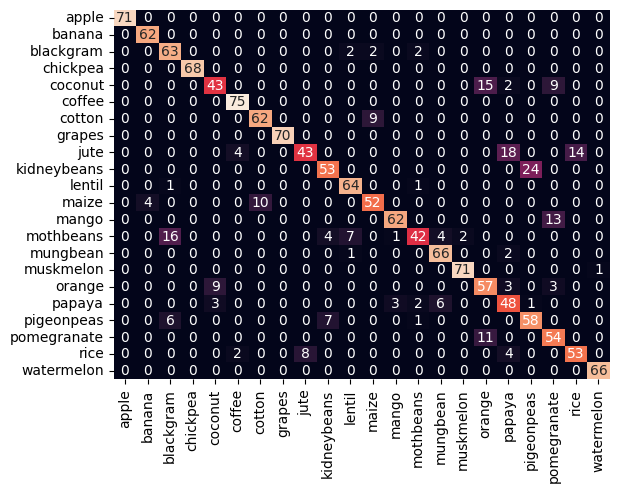

In [27]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(15, 15))
model.fit(Xtrain, Ytrain)
evaluate_model(model, 'MLP', indepth=False)

(0.6, 1.0)

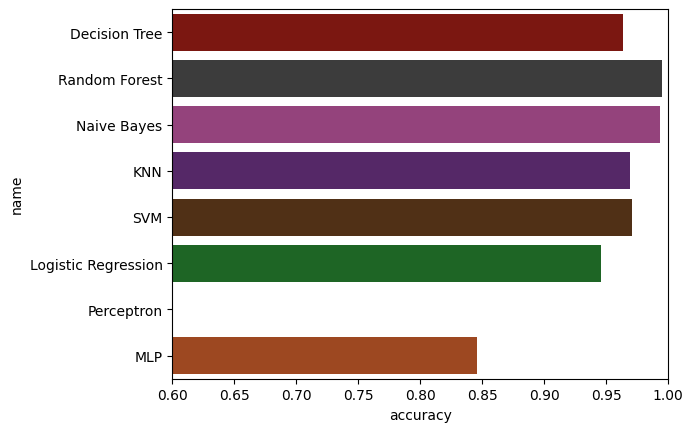

In [28]:
from matplotlib import pyplot as plt

sns.barplot(
    data=analysis,
    x='accuracy', y='name',
    palette='dark',
    orient='h',
    hue='accuracy',
    dodge=False,
    legend=False,
)
plt.xlim(0.6, 1.0)